In [1]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [204]:
import matplotlib.colors as colors

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 12

In [75]:
import pandas as pd

import numpy as np

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

**The data**

In [4]:
df = pd.read_csv("../data/counting_two_bit/_beta_1_seed_1_c_0.5.csv")

In [6]:
df = df.drop_duplicates()

In [7]:
names2 = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]

In [9]:
df.columns = names2

In [12]:
(df['p_2'] == df['p_3']).all()

True

In [22]:
def frequencies(df, max_steps=10 ** 7):

    frequencies = []
    previous = 0
    for value in df["t"][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(max_steps - previous)

    df["frequencies"] = np.array(frequencies)
    df["frequencies norm"] = np.array(frequencies) / max_steps

    return df

In [26]:
df = frequencies(df)

/var/folders/19/1t7slkb13h578dr5bl_47kf80000gp/T/ipykernel_27847/3086402839.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["frequencies"] = np.array(frequencies)
/var/folders/19/1t7slkb13h578dr5bl_47kf80000gp/T/ipykernel_27847/3086402839.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["frequencies norm"] = np.array(frequencies) / max_steps


In [85]:
high = df[df['frequencies'] > 10 ** 3 + 10]

In [86]:
X = high[['p_4', 'p_2', 'p_1']].values

In [87]:
x = np.arange(0, 1, 0.03)

y1 = np.arange(0, 1, 0.03)

y2 = np.arange(0, 1, 0.03)

xx1, yy1 = np.meshgrid(x, y1)

z = 1 - (.5 / 1) + xx1 * 0 + yy1 * 0

z2 = 1 - (.5 / 2 * 1)

In [88]:
r0 = 1 - (.5 / 1)

r1 = 1 - (.5 / 2 * 1)

In [89]:
v = np.array([[0, 0, 1],
              [0, r1, 1],
              [r0, r1, 1],
              [r0, 0, 1]])

verts = [[v[0], v[1], v[2], v[3], v[0]]]

/var/folders/19/1t7slkb13h578dr5bl_47kf80000gp/T/ipykernel_27847/776535590.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0, "", "", "", "", 1])
/var/folders/19/1t7slkb13h578dr5bl_47kf80000gp/T/ipykernel_27847/776535590.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([0, "", "", "", "", 1])
/var/folders/19/1t7slkb13h578dr5bl_47kf80000gp/T/ipykernel_27847/776535590.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_zticklabels([0, "", "", "", "", 1]);


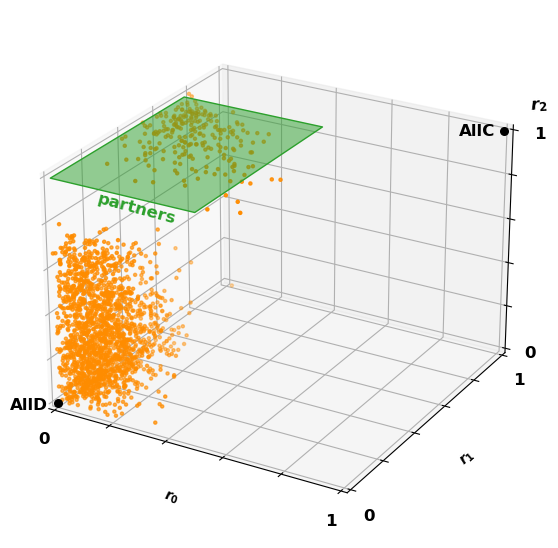

In [216]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121, projection='3d', computed_zorder=False)

axes = [ax1]

ax1.scatter(0, 0, 0, color='black',zorder=1, s=30);

ax1.scatter(1, 1, 1, color='black',zorder=1, s=30);

ax1.scatter(X[:,0], X[:,1], X[:,2], color='darkorange', s=5, zorder=-2)

# ax1.plot_surface(z, xx1, yy1, alpha=0.5, color='crimson');

ax1.add_collection3d(Poly3DCollection(verts, facecolors="tab:green", alpha=.5,
                                     linewidths=1,
                                     linestyle='-',
                                     edgecolors='tab:green',
                                     zorder=0))

# ax1.plot_surface(xx1, z2, yy1, alpha=0.2, color='crimson');

ax1.view_init(25, -60)



# for ax in axes:

ax1.set_xlim(0, 1);
ax1.set_ylim(0, 1);
ax1.set_zlim(0, 1);

ax1.set_xlabel("$r_0$", fontsize=10)
ax1.set_ylabel("$r_1$", fontsize=10)
# ax1.set_zlabel("$r_2$", fontsize=10);

ax1.annotate("AllD", (-0.095, -0.05), fontsize=12);

ax1.annotate("AllC", (0.062, 0.046), fontsize=12);

ax1.annotate("$r_2$", (0.087, 0.055), fontsize=12, rotation=5);

ax1.annotate("partners", (-0.065, 0.015), fontsize=12, rotation=-15, color="tab:green", zorder=1);

ax1.set_xticklabels([0, "", "", "", "", 1])
ax1.set_yticklabels([0, "", "", "", "", 1])
ax1.set_zticklabels([0, "", "", "", "", 1]);


fig.savefig("../figures/counting_strategies_evolution.pdf", bbox_inches='tight')